In [1]:
from gp import *


In [2]:
input_file = '../training_results/1D_500/train_inputs.json'
var_file = '../training_results/1D_500/train_outputs_var.json'
output_file = '../training_results/1D_500/train_outputs_mean.json'
input_type = 'I'
output_type = 'T'


In [3]:
gp = LPI_GP_1D(input_file = input_file, input_type = input_type, output_file = output_file, output_type = output_type, var_file = var_file)

In [4]:
gp.optimise_noise_GP()

l =  0.14563484775012445 var =  0.30888435964774846


In [5]:
gp.optimise_GP()

l =  0.2823235745107107 var =  0.4936931991177908


In [6]:
X_star = np.geomspace(1e14, 1e17, 1000)[:,None]


Y_star, sig_epi, sig_noise = gp.GP_predict(X_star, get_std=True)

In [7]:
X = gp.get_input()
Y = gp.get_output()

In [8]:
X_all = read_json_file('../training_results/1D_500/all_inputs.json')
Y_all = read_json_file('../training_results/1D_500/all_outputs.json')


In [9]:
if input_type == 'I':
    X_all = X_all[:,0]
if input_type == 'Ln':
    X_all = X_all[:,1]

if output_type == 'P':
    Y_all = Y_all[:,0].flatten()
if output_type == 'T':
    Y_all = Y_all[:,1].flatten()
if output_type == 'E':
    Y_all = Y_all[:,2].flatten()


 <ipython-input-14-db02a3f87220>:13: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.


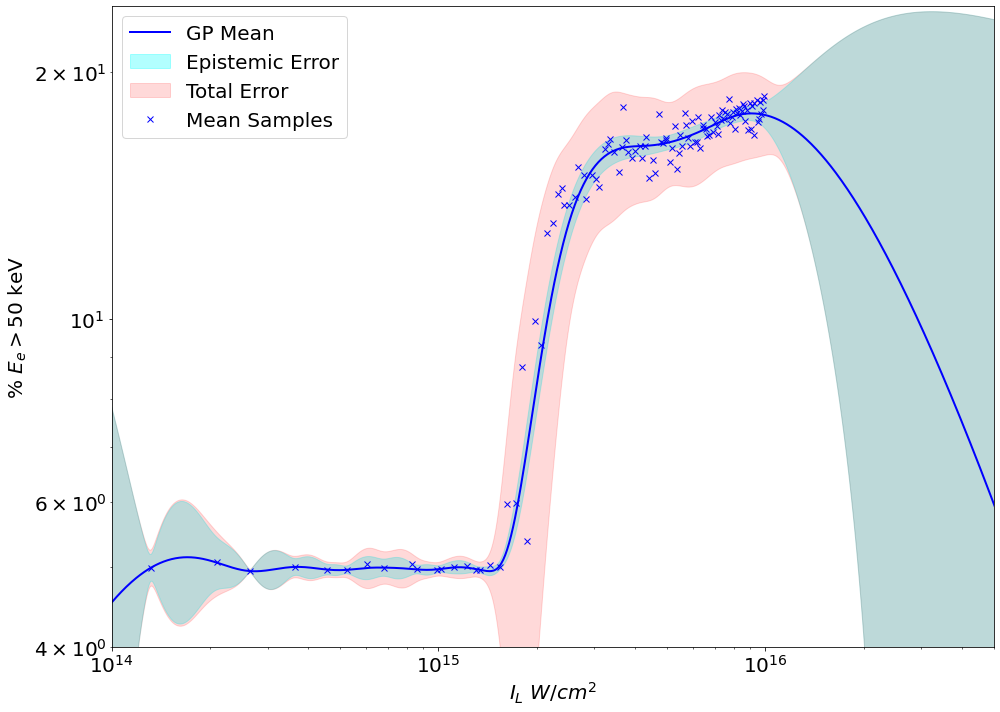

In [14]:
plt.rcParams["figure.figsize"] = [14, 10]
error_epi = 2*sig_epi
error_tot = 2*np.sqrt((sig_noise**2 + sig_epi**2))

Y_s = Y_star.flatten()
X_s = X_star.flatten()

plt.loglog(X_s, Y_s, color = 'blue', label = 'GP Mean')
plt.fill_between(X_s, (Y_s-error_epi), (Y_s+error_epi), alpha = 0.3, color = 'cyan', label = 'Epistemic Error')
plt.fill_between(X_s, (Y_s-error_tot), (Y_s+error_tot), alpha = 0.15, color = 'red', label = 'Total Error')
# plt.plot(X_all, Y_all, 'kx', color = 'red', label = 'All Samples', alpha = 0.8)
if output_type == 'T':
    plt.plot(np.exp(X), Y, 'kx', color = 'blue', label = 'Mean Samples')
else:
    plt.plot(np.exp(X), np.exp(Y), 'kx', color = 'blue', label = 'Mean Samples')
plt.xlim(1e14, 5e16)
plt.ylim(4, 24)
plt.ylabel(r'$\% \,\, E_{e} > 50$ keV')
plt.xlabel(r'$I_{L} \,\, W/cm^{2}$')
plt.legend(loc = 0)

In [11]:
# plt.rcParams["figure.figsize"] = [14, 10]
# fig, ax1 = plt.subplots()
# ax1.loglog(X_s, Y_s*X_s, color = 'blue', label = 'GP Mean')
# ax1.fill_between(X_s, (Y_s-error_epi)*X_s, (Y_s+error_epi)*X_s, alpha = 0.3, color = 'cyan', label = 'Epistemic Error')
# ax1.fill_between(X_s, (Y_s-error_tot)*X_s, (Y_s+error_tot)*X_s, alpha = 0.15, color = 'red', label = 'Total Error')
# ax1.plot(X_all, Y_all*X_all, 'kx', alpha = 0.8, color = 'red', label = 'All Samples')
# ax1.plot(X, Y*X, 'kx', color = 'blue', label = 'Mean Samples')
# ax1.set_ylim(3e10, 5e15)
# ax1.set_xlim(1e14, 1.5e16)
# ax1.set_xlabel(r'$I_{L} \,\, W/cm^{2}$')
# ax1.set_ylabel(r'$I_{SRS} \,\, W/cm^{2}$')
# ax1.legend(loc = 4)
# l, b, h, w = 0.18, .35, .6, .35
# ax2 = fig.add_axes([l, b, w, h])
# ax2.plot(X_s, Y_s, color = 'blue')
# ax2.fill_between(X_s, (Y_s-error_epi), (Y_s+error_epi), alpha = 0.3, color = 'cyan')
# ax2.fill_between(X_s, (Y_s-error_tot), (Y_s+error_tot), alpha = 0.15, color = 'red')
# ax2.plot(X_all, Y_all, 'kx', alpha = 0.8, color = 'red')
# ax2.plot(X, Y, 'kx', color = 'blue')
# ax2.set_ylim(0, 0.4)
# ax2.set_xlim(1e14, 1.1e16)
# ax2.set_ylabel(r'$\mathcal{P}$')
# ax2.set_xlabel(r'$I_{L} \,\, W/cm^{2}$')

In [12]:
print(Y_s)

[ 4.52703858  4.54155736  4.55595406  4.57022632  4.58437175  4.59838801
  4.61227271  4.6260235   4.639638    4.65311385  4.66644871  4.67964022
  4.69268603  4.70558382  4.71833125  4.73092601  4.74336579  4.75564831
  4.76777128  4.77973244  4.79152955  4.80316038  4.81462272  4.82591438
  4.8370332   4.84797704  4.85874378  4.86933133  4.87973765  4.88996069
  4.89999848  4.90984904  4.91951046  4.92898084  4.93825836  4.9473412
  4.95622761  4.96491587  4.97340434  4.9816914   4.98977549  4.99765512
  5.00532885  5.0127953   5.02005314  5.02710112  5.03393805  5.04056279
  5.04697428  5.05317152  5.05915359  5.06491963  5.07046885  5.07580053
  5.08091406  5.08580885  5.09048444  5.09494042  5.09917649  5.1031924
  5.10698802  5.1105633   5.11391828  5.1170531   5.11996798  5.12266326
  5.12513939  5.12739689  5.12943644  5.13125878  5.1328648   5.13425549
  5.13543198  5.1363955   5.13714744  5.13768928  5.13802268  5.13814941
  5.13807139  5.1377907   5.13730954  5.13663031  5.1